<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
#ваш код здесь
hh_data = pd.read_csv('data/hh_database.csv', delimiter=';')

2. Выведите несколько первых (последних строк таблицы), чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
#ваш код здесь
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


In [4]:
hh_data.shape

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице

4. Обратите внимание на информацию о числе непустых значений

In [5]:
#ваш код здесь
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [6]:
#ваш код здесь
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Московский технически...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
#ваш код здесь
def education_sep(value):
    education_list = value.split()
    if education_list[0] == 'Высшее':
        return 'высшее'
    elif education_list[0] == 'Неоконченное' and education_list[1] == 'высшее':
        return 'неоконченное высшее'
    elif education_list[0] == 'Среднее' and education_list[1] == 'специальное':
        return 'среднее специальное'
    elif education_list[0] == 'Среднее':
        return 'среднее'
    else:
        return 'не определено' #такого не оказалось, но для полноты картины оставил и это

hh_df = hh_data.copy() #на всякий случай создаем копию данных
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(education_sep)
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)

hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное


2. Теперь нас интересует столбец **"Пол/возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
#ваш код здесь
def sex_sep(value):
    sex_list = value.split() #формат ['Мужчина', ',', '60', 'лет', ',', 'родился', '20', 'марта', '1959']
    if sex_list[0] == 'Мужчина':
        return 'М'
    elif sex_list[0] == 'Женщина':
        return 'Ж'
    else:
        return 'Не определено' #надеюсь, такого не будет
    
def age_sep(value):
    age_list = value.split()
    return int(age_list[2])

hh_df['Пол'] = hh_df['Пол, возраст'].apply(sex_sep)
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(age_sep)
hh_df = hh_df.drop('Пол, возраст', axis=1)

hh_df.head(3)

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-третьих, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
hh_df['Опыт работы'] = hh_df['Опыт работы'].fillna(0)

def work_sep(value):
    if value == 0:
        return np.NaN
    else:
        exclude_list_year = ['год', 'года', 'лет']
        exclude_list_month = ['месяц', 'месяца', 'месяцев', 'мес']
        value_string = value[:40]
        value_list = value_string.split()
        
        year_index = 0
        years = 0
        for year_word in exclude_list_year:
            if year_word in value_list:
                year_index = int(value_list.index(year_word)) - 1
                years = int(value_list[year_index])
        
        month_index = 0
        months = 0      
        for month_word in exclude_list_month:
            if month_word in value_list:
                month_index = int(value_list.index(month_word)) - 1
                months = int(value_list[month_index])
                
        return years*12 + months     


hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(work_sep)
hh_df = hh_df.drop('Опыт работы', axis=1)
hh_df.head(3)

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0


In [10]:
#Удостоверимся, что пропусков осталось столько же, сколько и в изначальном датафрейме
hh_data['Опыт работы'].isna().sum() == hh_df['Опыт работы (месяц)'].isna().sum()

True

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов миллионников:
    
   <code> million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [11]:
#ваш код здесь
def city_sep(value):
    cities_top = ['Москва', 'Санкт-Петербург']
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    value_list = value.split()
    target_city = value_list[0]
    if target_city in cities_top:
        return target_city
    elif target_city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'


def transfer_sep(value):
    exclude_list = ['не готов', 'не готова', 'нет', 'не хочу', 'не буду', 'не могу', 'не собираюсь', 'нет возможности', 'нет желания']
    position = value.find('перее')
    mark = 0
    if position == -1: #возвращается -1, если не находится нужное значение. Но вроде бы такого быть не должно
        mark = 0 #по умолчанию считаем, что соискатель готов к переезду (если не указано обратного)
    else:
        new_string = value[:position]
        for word in exclude_list:
            if new_string.find(word) > 0:
                mark += 1
    if mark > 0:
        return False
    else:
        return True

    
def trip_sep(value):
    exclude_list = ['не готов', 'не готова', 'нет', 'не хочу', 'не буду', 'не могу', 'не собираюсь', 'нет возможности', 'нет желания']
    position_transfer = value.find('перее')
    position_trip = value.find('командиро')
    mark = 0
    if position_trip == -1: #возвращается -1, если не находится нужное значение. Но вроде бы такого быть не должно
        mark = 0 #по умолчанию считаем, что соискатель готов к переезду (если не указано обратного)
    else:
        new_string = value[position_transfer:position_trip]
        for word in exclude_list:
            if new_string.find(word) > 0:
                mark += 1
    if mark > 0:
        return False
    else:
        return True
    
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(city_sep)
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(transfer_sep)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(trip_sep)
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)
hh_df.head(3)

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [12]:
#ваш код здесь
def busyness_sep(value):
    full_busy = False   #полная занятость
    part_busy = False   #частичная занятость
    proect_busy = False #проектная работа
    intern_busy = False #стажировка
    volunt_busy = False #волонтерство
    
    if value.find('полная занятость') != -1:
        full_busy = True
    if value.find('частичная занятость') != -1:
        part_busy = True
    if value.find('проектная работа') != -1:
        proect_busy = True
    if value.find('стажировка') != -1:
        intern_busy = True
    if value.find('волонтерство') != -1:
        volunt_busy = True
        
    return full_busy, part_busy, proect_busy, intern_busy, volunt_busy


def schedule_sep(value):
    full_schedule = False   #полный день
    shift_schedule  = False #сменный график
    flex_schedule = False   #гибкий график
    remote_schedule = False #удалённая работа
    vaht_schedule = False   #вахтовый метод
    
    if value.find('полный день') != -1:
        full_schedule = True
    if value.find('сменный график') != -1:
        shift_schedule = True
    if value.find('гибкий график') != -1:
        flex_schedule = True
    if value.find('удаленная работа') != -1:
        remote_schedule = True
    if value.find('вахтовый метод') != -1:
        vaht_schedule = True
    
    return full_schedule, shift_schedule, flex_schedule, remote_schedule, vaht_schedule

hh_df['Полная занятость'], hh_df['Частичная занятость'], hh_df['Проектная работа'], hh_df['Стажировка'], hh_df['Волонтерство'] = zip(*hh_df['Занятость'].apply(busyness_sep))
hh_df['Полный день'], hh_df['Сменный график'], hh_df['Гибкий график'], hh_df['Удаленная работа'], hh_df['Вахтовый метод'] = zip(*hh_df['График'].apply(schedule_sep))
hh_df = hh_df.drop(['Занятость', 'График'], axis=1)
hh_df.head(3)
    

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,Полная занятость,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,True,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [13]:
#Считываем таблицу с курсами валют
currency_df = pd.read_csv('data/ExchangeRates.csv')

#Приводим поле 'Обновление резюме' к формату datetime, выделяем оттуда дату. В таблице с валютами поле с датой тоже приводим к datetime
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме'])
hh_df['Дата'] = hh_df['Обновление резюме'].dt.date
hh_df['Дата'] = pd.to_datetime(hh_df['Дата'])
currency_df['date'] = pd.to_datetime(currency_df['date'])

#Функция для обработки поля с зарплатой, возвращающая сумму ЗП и валюту в формате ISO
def salary_sep(value):
    salary_list = value.split()
    salary = int(salary_list[0])
    currency_old = salary_list[1]
    
    currency_new = currency_old.replace('.', '')
    currency_dict = {
        'руб': 'RUB',
        'грн': 'UAH',
        'USD': 'USD',
        'EUR': 'EUR',
        'белруб': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT', 
    }
    currency = currency_dict[currency_new]
    
    return salary, currency


#Создаем столбцы с суммой и валютой
hh_df['Сумма'], hh_df['Валюта'] = zip(*hh_df['ЗП'].apply(salary_sep))

#Удаляем из таблицы с валютами ненужные поля (для небольшой экономии памяти при будущем соединении)
currency_df = currency_df.drop(['per', 'time', 'vol'], axis=1)

#Присоединяем к основной таблице таблицу с валютами. Соединение левое, чтобы не потерять строки с рублями
hh_df = hh_df.merge(
    currency_df,
    left_on=['Дата', 'Валюта'],
    right_on=['date', 'currency'],
    how='left'
)

#Заполняем пропуски (строки с рублевой валютой) в полях с ценой закрытия и пропорцией на 1
hh_df['close'] = hh_df['close'].fillna(1)
hh_df['proportion'] = hh_df['proportion'].fillna(1)

#Создаем поле с итоговой ЗП соискателя в рублях
hh_df['ЗП (руб)'] = hh_df['Сумма'] * hh_df['close'] / hh_df['proportion']

#Удаляем более ненужные столбцы
hh_df = hh_df.drop(['ЗП', 'Сумма', 'Валюта', 'Дата', 'date', 'currency', 'close', 'proportion'], axis=1)

#Выведем медианную ЗП для задания 3.6
hh_df['ЗП (руб)'].median()

59019.0

In [14]:
hh_df.head()

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,Частичная занятость,Проектная работа,Стажировка,Волонтерство,Полный день,Сменный график,Гибкий график,Удаленная работа,Вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16 15:59:00,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-12-04 08:42:00,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,True,False,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16 08:35:00,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-08-04 14:23:00,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,False,False,True,True,False,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22 10:32:00,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,True,False,False,False,False,140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

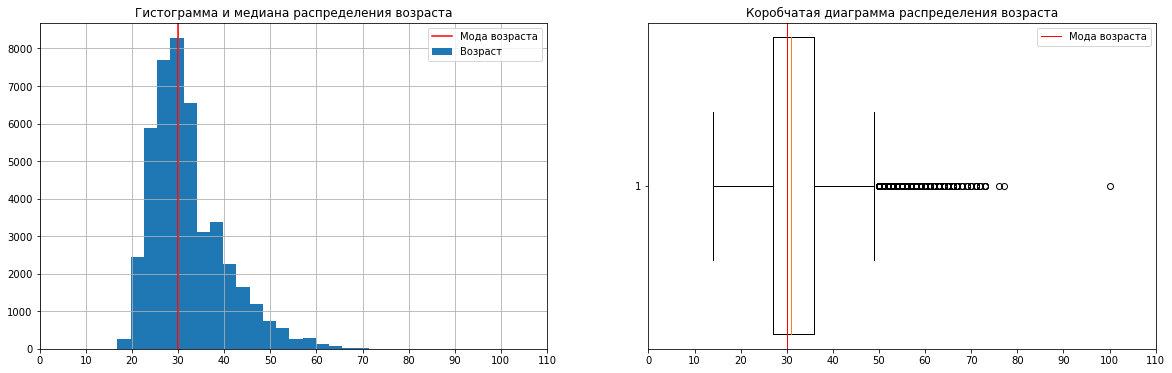

In [15]:
#Гистограмма и коробчатая диаграмма распределения возраста соискателей
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

axes[0].hist(
    x=hh_df['Возраст'],
    label='Возраст',
    bins=30
)
axes[0].axvline(
    x=int(hh_df['Возраст'].mode()),
    label='Мода возраста',
    color='red'
)
axes[0].set_title('Гистограмма и медиана распределения возраста')
axes[0].legend()
axes[0].grid()
axes[0].set_xticks(range(0, 120, 10))


axes[1].boxplot(
    hh_df['Возраст'],
    vert=False,
    widths=2
)
axes[1].axvline(
    x=int(hh_df['Возраст'].mode()),
    label='Мода возраста',
    linewidth = 1,
    color='red'
)
axes[1].set_title('Коробчатая диаграмма распределения возраста')
axes[1].set_xticks(range(0, 120, 10))
axes[1].legend();

In [16]:
print('Мода возраста соискателей =', int(hh_df['Возраст'].mode()), 'лет')
print('Минимальный возраст соискателей =', int(hh_df['Возраст'].min()), 'лет')
print('Максимальный возраст соискателей =', int(hh_df['Возраст'].max()), 'лет')

Мода возраста соискателей = 30 лет
Минимальный возраст соискателей = 14 лет
Максимальный возраст соискателей = 100 лет


## Выводы по графикам:
#### 1. Модальное значение возраста соискателей равна 30 годам
#### 2. Возраст соискателей распределен между 14 и 100 годами, большинство соискателей с возрастом примерно от 27 до 36 лет
#### 3. По коробчатой диаграмме аномальными оказались возраста больше 50 лет. Есть один соискатель с возрастом 100 лет. Видимо, какой-то шутник

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

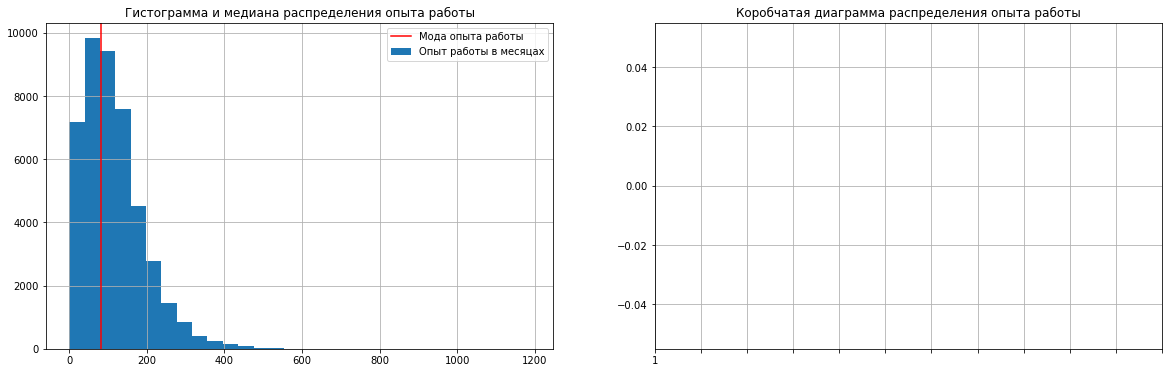

In [120]:
#Гистограмма и коробчатая диаграмма распределения опыта соискателей (в месяцах)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

axes[0].hist(
    x=hh_df['Опыт работы (месяц)'],
    label='Опыт работы в месяцах',
    bins=30
)
axes[0].axvline(
    x=int(hh_df['Опыт работы (месяц)'].mode()),
    label='Мода опыта работы',
    color='red'
)
axes[0].set_title('Гистограмма и медиана распределения опыта работы')
axes[0].legend()
axes[0].grid()
#axes[0].set_xticks(range(0, 120, 10))


axes[1].boxplot(
    hh_df['Опыт работы (месяц)'],
    vert=True,
    widths=1
)
'''axes[1].axvline(
    x=int(hh_df['Опыт работы (месяц)'].mode()),
    label='Мода опыта работы',
    linewidth = 1,
    color='red'
)
'''
axes[1].set_title('Коробчатая диаграмма распределения опыта работы')
axes[1].set_xticks(range(0, 1200, 100))

axes[1].grid();

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe98f6682b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe98f668970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe98f65bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe98f675070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe98f6753a0>],
 'means': []}

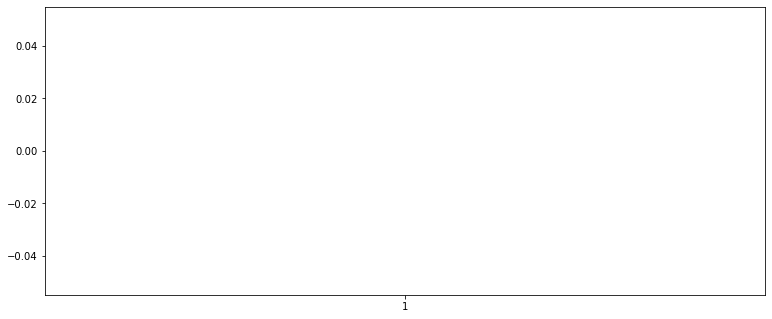

In [124]:
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])

axes.boxplot(hh_df['Опыт работы (месяц)'])

In [108]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44576 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  bool     

ваши выводы здесь

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


"\naxes[1].boxplot(\n    hh_df['ЗП (руб)'],\n    vert=False,\n    widths=2\n)\naxes[1].axvline(\n    x=int(hh_df['ЗП (руб)'].mode()),\n    label='Мода возраста',\n    linewidth = 1,\n    color='red'\n)\naxes[1].set_title('Коробчатая диаграмма распределения возраста')\n#axes[1].set_xticks(range(0, 120, 10))\naxes[1].legend();\n"

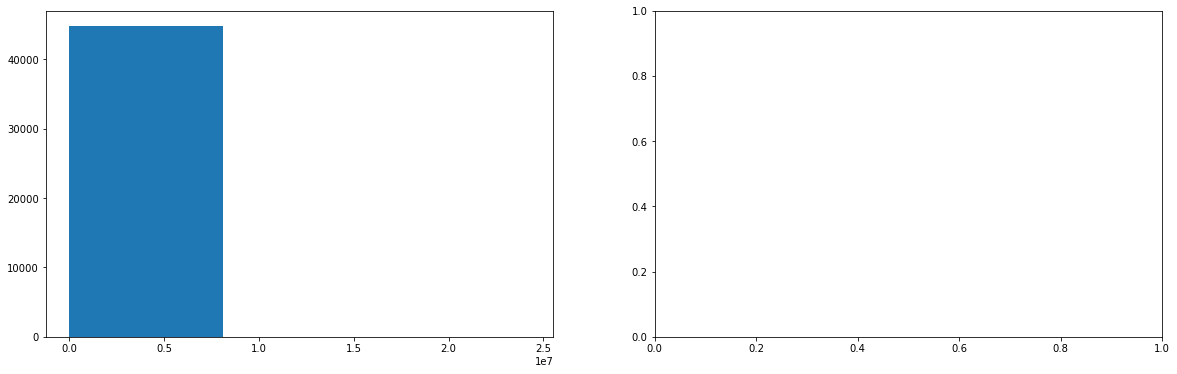

In [44]:
#Гистограмма и коробчатая диаграмма распределения возраста соискателей
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

axes[0].hist(
    x=hh_df['ЗП (руб)'],
    label='Возраст',
    bins=3
)
'''
axes[0].axvline(
    x=int(hh_df['ЗП (руб)'].mode()),
    label='Мода возраста',
    color='red'
)
axes[0].set_title('Гистограмма и медиана распределения возраста')
axes[0].legend()
axes[0].grid()
#axes[0].set_xticks(range(0, 1000, 10))
'''
'''
axes[1].boxplot(
    hh_df['ЗП (руб)'],
    vert=False,
    widths=2
)
axes[1].axvline(
    x=int(hh_df['ЗП (руб)'].mode()),
    label='Мода возраста',
    linewidth = 1,
    color='red'
)
axes[1].set_title('Коробчатая диаграмма распределения возраста')
#axes[1].set_xticks(range(0, 120, 10))
axes[1].legend();
'''

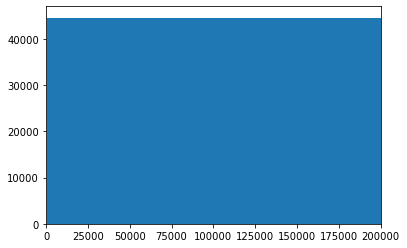

In [43]:
fig, ax1 = plt.subplots()
#ax1.hold(True)
ax1.hist(
    hh_df['ЗП (руб)'],
    linewidth=1,
    edgecolor="white",
    bins=3
)
ax1.set(xlim = (0, 200000))
plt.show()

<AxesSubplot:xlabel='ЗП (руб)', ylabel='Count'>

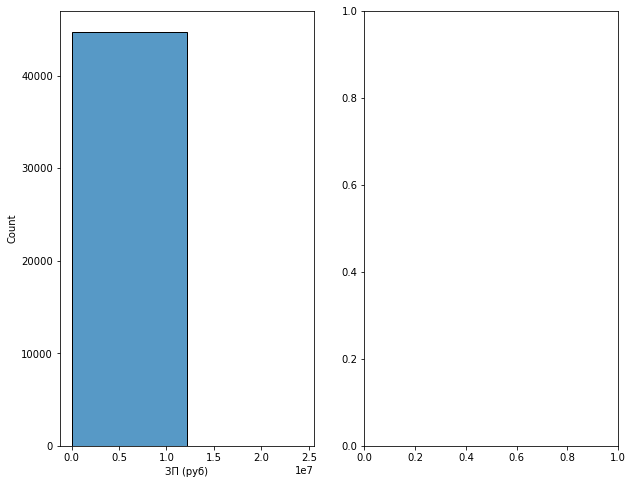

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))
sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    bins=2,
    ax=axes[0]
)

In [35]:
test = hh_df['ЗП (руб)'].unique()

ваши выводы здесь

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**? В какую сторону **асимметрично логарифмическое распределение**? Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

In [ ]:
# ваш код здесь